In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from scipy.signal import savgol_filter

In [2]:
sqlite_dr_vs_rg_db = "dr_vs_rg.db"
rg0 = 2.7
dr_cutoff = 5.0 # 2*rc

In [4]:
leq_cutoff_df = []
geq_cutoff_df = []
for root, dirs, files in os.walk("/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000"):
    for d in dirs:
        path = os.path.join(os.path.join(root, d), sqlite_dr_vs_rg_db)
        if os.path.exists(path):
            engine = create_engine(f"sqlite:///{path}", echo=False)
            print(path)
            leq_cutoff_df.append(pd.read_sql(f"select * from dr_vs_rg where dr < {dr_cutoff}", con=engine))
            geq_cutoff_df.append(pd.read_sql(f"select * from dr_vs_rg where dr > {dr_cutoff}", con=engine))

/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run1/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run10/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run6/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run7/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run8/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run9/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/run2/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/melts_non_thermosttated_runs/one_epsilon/phi0d2_r125_p1000/

In [5]:
leq_cutoff_data = pd.concat(leq_cutoff_df)
geq_cutoff_data = pd.concat(geq_cutoff_df)

In [3]:
# histogram bins
rg_bins = np.linspace(0.5*rg0, 2.0*rg0, 20)/rg0
rg_centers = (rg_bins[1:]+rg_bins[:-1])/2.0

In [203]:
leq_cutoff_hist_data, _ = np.histogram(leq_cutoff_data['rg']/rg0, rg_bins, density=True)
geq_cutoff_hist_data, _ = np.histogram(geq_cutoff_data['rg']/rg0, rg_bins, density=True)

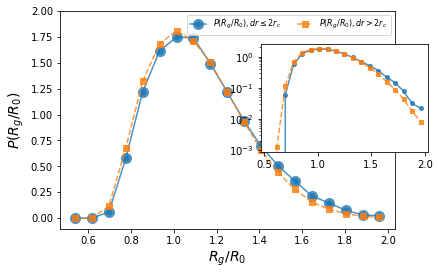

In [242]:
fig, ax1 = plt.subplots()

ax1.plot(rg_centers, leq_cutoff_hist_data, 'o-', mew=5, alpha=0.8, label=r'$P(R_g/R_0), dr \leq 2r_c$')
ax1.plot(rg_centers, geq_cutoff_hist_data, 's--', mew=1, alpha=0.8, label=r'$P(R_g/R_0), dr > 2r_c$')
ax1.set_ylim([-0.1, 2.0])
ax1.legend(fontsize=8, ncol=2, loc='upper right')

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax1, [0.6, 0.35, 0.5, 0.5])
ax2.set_axes_locator(ip)
ax2.plot(rg_centers, leq_cutoff_hist_data, 'o-', ms=4, alpha=0.8)
ax2.plot(rg_centers, geq_cutoff_hist_data, 's--', ms=4, alpha=0.8)
ax2.set_yscale('log')
ax1.set_ylabel(r'$P(R_g/R_0)$', fontsize=14)
ax1.set_xlabel(r'$R_g/R_0$', fontsize=14)
plt.savefig('phi0d2_eps1d0_prg_vs_dr.pdf', format='pdf')

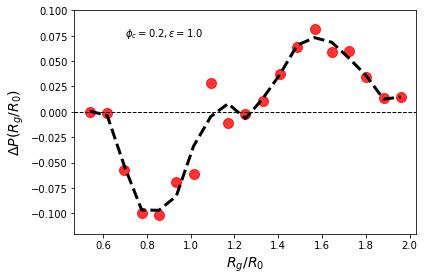

In [241]:
fig, ax1 = plt.subplots()

ax1.plot(rg_centers, leq_cutoff_hist_data - geq_cutoff_hist_data, 'o', ms=10, alpha=0.8, color='r')
ax1.plot(rg_centers, savgol_filter(leq_cutoff_hist_data - geq_cutoff_hist_data, 5, 3), ls='--', lw=3, color='k')
ax1.set_ylim([-0.12, 0.1])
ax1.axhline(y=0, ls='--', lw=1, color='k')
ax1.set_xlabel(r'$R_g/R_0$', fontsize=14)
ax1.set_ylabel(r'$\Delta P(R_g/R_0)$', fontsize=14)
ax1.text(0.7, 0.075, r'$\phi_c = 0.2, \epsilon = 1.0$')
plt.tight_layout()
plt.savefig('phi0d2_eps1d0_delta_prg_vs_dr.pdf', format='pdf')

### Old runs

In [4]:
leq_cutoff_df = []
geq_cutoff_df = []
for root, dirs, files in os.walk("/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000"):
    for d in dirs:
        if d in ['run1', 'run2', 'run3', 'run4', 'run5']:
            path = os.path.join(os.path.join(root, d), sqlite_dr_vs_rg_db)
            if os.path.exists(path):
                engine = create_engine(f"sqlite:///{path}", echo=False)
                print(path)
                leq_cutoff_df.append(pd.read_sql(f"select * from dr_vs_rg where dr < {dr_cutoff}", con=engine))
                geq_cutoff_df.append(pd.read_sql(f"select * from dr_vs_rg where dr > {dr_cutoff}", con=engine))

/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000/run1/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000/run2/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000/run3/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000/run4/dr_vs_rg.db
/storage/backups/seagate/polymer_melts/simulations/larger_system/phi0.2_r125_p1000/run5/dr_vs_rg.db


In [5]:
leq_cutoff_data = pd.concat(leq_cutoff_df)
geq_cutoff_data = pd.concat(geq_cutoff_df)

In [6]:
leq_cutoff_data = pd.concat(leq_cutoff_df)
geq_cutoff_data = pd.concat(geq_cutoff_df)

In [7]:
leq_cutoff_hist_data, _ = np.histogram(leq_cutoff_data['rg']/rg0, rg_bins, density=True)
geq_cutoff_hist_data, _ = np.histogram(geq_cutoff_data['rg']/rg0, rg_bins, density=True)

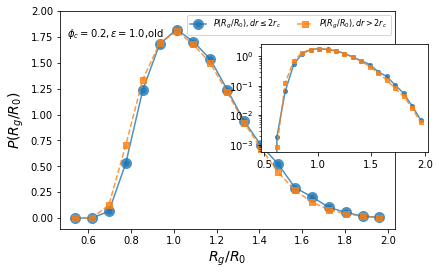

In [21]:
fig, ax1 = plt.subplots()

ax1.plot(rg_centers, leq_cutoff_hist_data, 'o-', mew=5, alpha=0.8, label=r'$P(R_g/R_0), dr \leq 2r_c$')
ax1.plot(rg_centers, geq_cutoff_hist_data, 's--', mew=1, alpha=0.8, label=r'$P(R_g/R_0), dr > 2r_c$')
ax1.set_ylim([-0.1, 2.0])
ax1.legend(fontsize=8, ncol=2, loc='upper right')

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax1, [0.6, 0.35, 0.5, 0.5])
ax2.set_axes_locator(ip)
ax2.plot(rg_centers, leq_cutoff_hist_data, 'o-', ms=4, alpha=0.8)
ax2.plot(rg_centers, geq_cutoff_hist_data, 's--', ms=4, alpha=0.8)
ax2.set_yscale('log')
ax1.set_ylabel(r'$P(R_g/R_0)$', fontsize=14)
ax1.set_xlabel(r'$R_g/R_0$', fontsize=14)
ax1.text(0.5, 1.75, r'$\phi_c = 0.2, \epsilon = 1.0$,old')
plt.savefig('phi0d2_eps1d0_prg_vs_dr_old.pdf', format='pdf')
plt.savefig('phi0d2_eps1d0_prg_vs_dr_old.png', format='png', dpi=300)

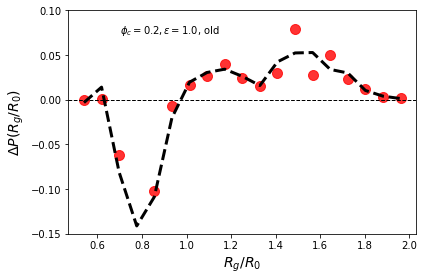

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(rg_centers, leq_cutoff_hist_data - geq_cutoff_hist_data, 'o', ms=10, alpha=0.8, color='r')
ax1.plot(rg_centers, savgol_filter(leq_cutoff_hist_data - geq_cutoff_hist_data, 5, 3), ls='--', lw=3, color='k')
ax1.set_ylim([-0.15, 0.1])
ax1.axhline(y=0, ls='--', lw=1, color='k')
ax1.set_xlabel(r'$R_g/R_0$', fontsize=14)
ax1.set_ylabel(r'$\Delta P(R_g/R_0)$', fontsize=14)
ax1.text(0.7, 0.075, r'$\phi_c = 0.2, \epsilon = 1.0$, old')
plt.tight_layout()
plt.savefig('phi0d2_eps1d0_delta_prg_vs_dr_old.pdf', format='pdf')